# PDF Text Converter and Generation Example
### Mt. SAC CISB 63 Final Project - Fall 2023
### Russell Luna

https://github.com/rmoon64/CISB63_Final/

Summary/Explanation of Project

The goal of this project was to convert a PDF file into a TXT file and generate text using the extracted content. It utilized various natural language processing techniques, such as part-of-speech tagging (POS), named entity recognition (NER), translation, frequency distributions, word clouds, and tokenization. First, I utilized PyPDF2 to extract the text from the PDF. Then, tokenize the extracted sentences into individual words to identify the most frequently used words and determine the significance of sentences for generating word clouds. To enhance entity visualization, I used displacy, which helped visualize entities such as organizations. Finally, we used Matplotlib to plot the graph for our frequency distribution (fdist).

### Import libraries

In [1]:
import tensorflow as tf
import re
import pandas as pd
import PyPDF2
import numpy as np
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Extract text
def convert_pdf_to_txt(pdf_path, txt_path):
    start_page = 17
    end_page = 35

    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfFileReader(pdf_file)
        text = ''
        for page_num in range(start_page - 1, min(end_page, pdf_reader.numPages)):
            page = pdf_reader.getPage(page_num)
            text += page.extractText()

    with open(txt_path, 'w', encoding='utf-8') as txt_file:
        txt_file.write(text)
    
# Add paths for PDF and text files
pdf_path = 'Maxwell Maltz - Psycho-Cybernetics_ Updated and Expanded Paperback – November 3, 2015.pdf'
txt_path = 'Output.txt'
    
# Call the function to convert the PDF to text
convert_pdf_to_txt(pdf_path, txt_path)

In [2]:
# Load the text
file_path = 'Output.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

In [3]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

In [4]:
# Data Transformation
txt_path = 'Output.txt'

# Read the text file into a DataFrame
df = pd.read_csv(txt_path, sep='\t')

# Use describe() to get statistical information about the DataFrame
print(df.describe())

# Use head() to preview the first five rows of the DataFrame
print(df.head())

# Use info() to get information about the DataFrame's structure and data types
print(df.info())

                                       General Principles
count                                                 595
unique                                                595
top     The self-image is the key to human personality...
freq                                                    1
                                  General Principles
0  The self-image is the key to human personality...
1  Change the self-image and you change the perso...
2  But more than this: The self-image sets the bo...
3  accomplishment. It defines what you can and ca...
4  self-image and you expand the “area of the pos...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   General Principles  595 non-null    object
dtypes: object(1)
memory usage: 4.8+ KB
None


### Create input sequences and corresponding labels
steps:
1. Initialize an Empty List
2. Tokenize the Text
3. Create N-gram Sequences

In [5]:
# Create input sequences and corresponding labels
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

### Data preparation
Let's prepare the input data by ensuring that all sequences have the same length, separating input sequences (X) from output labels (y), and one-hot encoding the output labels for training a language model.

steps:
1. Calculate Maximum Sequence Length
2. Pad Sequences
3. Create Input (X) and Output (y) Sequences
4. One-Hot Encode the Output (y)

X, y = input_sequences[:,:-1],input_sequences[:,-1]
- The X variable represents the input sequences, which include all elements of each sequence except the last one. 
- The y variable represents the labels, which are the last elements of each sequence.
- X represents the input sequences for training the language model.
- input_sequences[:, :-1] selects all elements in each row of input_sequences except for the last one.
- X consists of the first to second-to-last elements of each sequence in input_sequences.
- Each row of X corresponds to an input sequence that the model will use to predict the next word.

In [6]:
max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
X, y = input_sequences[:,:-1],input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [7]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_length-1))
# model.add(LSTM(150, return_sequences = True))
model.add(LSTM(100))
# model.add(Dense(150, activation = 'relu'))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 53, 50)            81500     
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 1630)              164630    
                                                                 
Total params: 306530 (1.17 MB)
Trainable params: 306530 (1.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Train the model
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100


251/251 [==============================] - 7s 19ms/step - loss: 6.0528 - accuracy: 0.0362
Epoch 2/100
251/251 [==============================] - 5s 19ms/step - loss: 5.3567 - accuracy: 0.0655
Epoch 3/100
251/251 [==============================] - 5s 19ms/step - loss: 5.1777 - accuracy: 0.0736
Epoch 4/100
251/251 [==============================] - 5s 19ms/step - loss: 5.0743 - accuracy: 0.0884
Epoch 5/100
251/251 [==============================] - 5s 19ms/step - loss: 4.9795 - accuracy: 0.0896
Epoch 6/100
251/251 [==============================] - 5s 19ms/step - loss: 4.9084 - accuracy: 0.0970
Epoch 7/100
251/251 [==============================] - 5s 18ms/step - loss: 4.8402 - accuracy: 0.1018
Epoch 8/100
251/251 [==============================] - 5s 18ms/step - loss: 4.7625 - accuracy: 0.1074
Epoch 9/100
251/251 [==============================] - 5s 18ms/step - loss: 4.6828 - accuracy: 0.1092
Epoch 10/100
251/251 [==============================] - 5s 18ms/step - loss: 4.5

### Function to generate text
Let's create a function generate_text that uses a trained language model to generate a sequence of words based on a given seed text.

Steps:
1. Function Definition
2. Tokenize the Seed Text
3. Pad Tokenized Sequence
4. Predict the Next Word
5. Map Index to Word
6. Update Seed Text
7. Return Generated Text

Note: generate_text is a function that takes four parameters:
- seed_text: The initial text or seed for generating the sequence.
- next_words: The number of words to generate.
- model: The trained language model.
- max_sequence_length: The maximum length of the input sequence.

In [9]:
# Function to generate text
def generate_text(seed_text, next_words, model, max_sequence_length):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0] # tokenizing the seed text
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre') # padding
        
        #The model is used to predict the index of the next word in the sequence using the predict method. 
        predicted = np.argmax(model.predict(token_list, verbose=0)) 
        
        # The predicted index is then mapped back to the corresponding word using the word_index attribute of the tokenizer
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        
        # The predicted word is appended to the seed text, creating an updated seed for the next iteration.
        seed_text += " " + output_word
    return seed_text

### Generate text
- generate_text is a function that takes four parameters: a seed text ("Call me Ishmael"), the number of words to generate (20), the trained model (model), and the maximum sequence length (max_sequence_length).
The function generates text by iteratively predicting the next word and appending it to the seed text.

In [44]:
# Generate text
generated_text = generate_text("Our self-image", 15, model, max_sequence_length)
print(generated_text)

Our self-image prescribes the limits for the accomplishment of any experience and a vicious or a beneficent


### Adding WordCloud

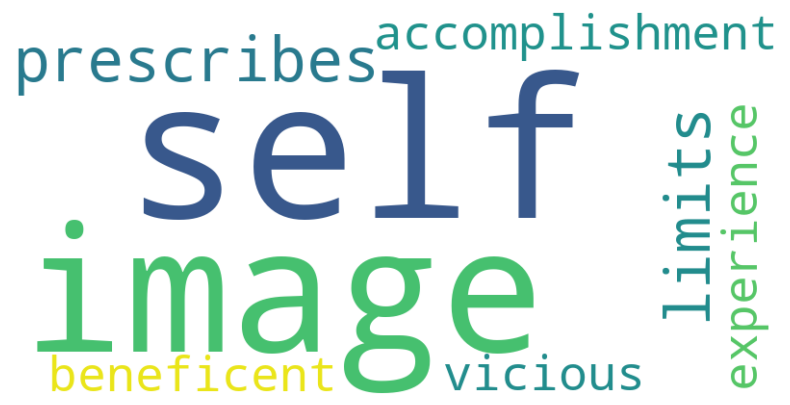

In [46]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(generated_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Adding Textblob

In [12]:
!pip install textblob

In [13]:
from textblob import TextBlob

In [55]:
# Create a TextBlob object with the text
blob = TextBlob(generated_text)

# Translate the text to Spanish
translated_blob = blob.translate('en', 'es')

# Print the translated text
print(translated_blob)

Nuestra autoimagen prescribe los límites para el logro de cualquier experiencia y una viciosa o beneficiosa


### Adding SpaCy

In [15]:
!pip install -U spacy

In [16]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 656.4 kB/s eta 0:00:20
      --------------------------------------- 0.3/12.8 MB 2.0 MB/s eta 0:00:07
     -- ------------------------------------- 0.7/12.8 MB 3.8 MB/s eta 0:00:04
     ---- ----------------------------------- 1.5/12.8 MB 7.0 MB/s eta 0:00:02
     ------- -------------------------------- 2.4/12.8 MB 8.8 MB/s eta 0:00:02
     --------- ------------------------------ 3.1/12.8 MB 10.0 MB/s eta 0:00:01
     ------------ --------------------------- 4.1/12.8 MB 10.8 MB/s eta 0:00:01
     --------------- ------------------------ 4.9/12.8 MB 11.9 MB/s eta 0:00:01
     ------------------ --------------------- 6.0/12.8 MB 13.1 MB/s eta 0:00:01
     --------------------- ------------------ 7.0/12.8 MB 13.9 MB/s eta 0:00:01
     ----------------------- ---------------- 7.6/12.8 MB 13

In [17]:
text = "A boy who was dropped from one college because of poor grades entered Columbia and became a straight “A” student. A girl who had flunked Latin four times, after three talks with the school counselor, finished with a grade of 84. A boy who was told by a testing bureau that he had no aptitude for English won an honorable mention the next year for a literary prize. The trouble with these students was not that they were dumb or lacking in basic aptitudes."

In [18]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

In [19]:
# Import the displaCy library
from spacy import displacy

In [20]:
doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True)

### Customizing Colors and Effects

- You can also pass background color and gradient options:

In [21]:
colors = {'ORG': 'linear-gradient(135deg, green 20%, cyan)', 'CARDINAL': 'radial-gradient(#e66465, #9198e5)'}

options = {'ents': ['ORG', 'CARDINAL'], 'colors':colors}

displacy.render(doc, style='ent', jupyter=True, options=options)

### POS

In [22]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\RL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [47]:
words = word_tokenize(generated_text)

In [48]:
nltk.pos_tag(words)

[('Our', 'PRP$'),
 ('self-image', 'NN'),
 ('prescribes', 'VBZ'),
 ('the', 'DT'),
 ('limits', 'NNS'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('accomplishment', 'NN'),
 ('of', 'IN'),
 ('any', 'DT'),
 ('experience', 'NN'),
 ('and', 'CC'),
 ('a', 'DT'),
 ('vicious', 'JJ'),
 ('or', 'CC'),
 ('a', 'DT'),
 ('beneficent', 'NN')]

In [49]:
#How many words are there? :
print (len(words))

17


In [50]:
#Import required libraries :
from nltk.probability import FreqDist

In [51]:
#Find the frequency :
fdist = FreqDist(words)

In [52]:
#Print 10 most common words :
fdist.most_common(10)

[('the', 2),
 ('a', 2),
 ('Our', 1),
 ('self-image', 1),
 ('prescribes', 1),
 ('limits', 1),
 ('for', 1),
 ('accomplishment', 1),
 ('of', 1),
 ('any', 1)]

In [53]:
#Plot the graph for fdist :
import matplotlib.pyplot as plt
%matplotlib inline

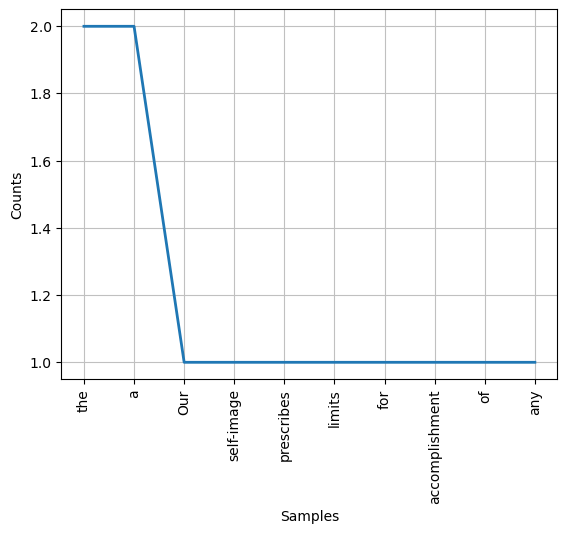

<Axes: xlabel='Samples', ylabel='Counts'>

In [54]:
fdist.plot(10)

Conclusion

In general, I believe the program performed quite well. From reading the book, I could tell the program was making a lot of inferences from the text but because it was taking from the general language flow and tone the author used, I'll consider it successful. Another improvement from the midterm was that the format, when compared to the original document, wasn't heavily altered and remained true to the original PDF file's.

Maltz, M. (2015). Psycho-Cybernetics: Updated and Expanded. Penguin.